Importing the Dependencies

In [ ]:

import pandas as pd
#for data handling
import numpy as np
#for number operations
import matplotlib.pyplot as plt
import seaborn as sns
#for plotting graphs
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

Load the Dataset

In [ ]:
url =  'https://docs.google.com/spreadsheets/d/1p_WuY33JZo00wRFvtI7kEAITRHrwG0OM/export?format=csv'
df = pd.read_csv(url)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Code to Analyze the Dataset:

In [ ]:
print("Dataset info:")
df.info()

Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
print("\nsummary Statistics:")
df.describe()



summary Statistics:


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
print("\nMissing Values in Each Column:")
print(df.isnull().sum())


Missing Values in Each Column:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


Visualize the Dataset

A) Check Diabetes Outcome Count(0 or 1)

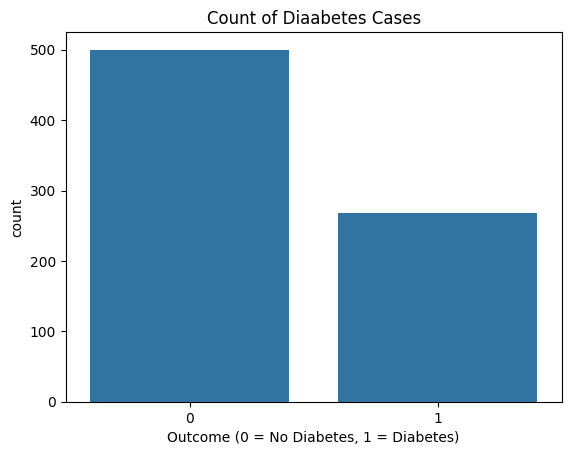

In [ ]:
sns.countplot(x='Outcome',data=df)
plt.title("Count of Diaabetes Cases")
plt.xlabel("Outcome (0 = No Diabetes, 1 = Diabetes)")
plt.ylabel("count")
plt.show()


B) Show Histograms for All Features

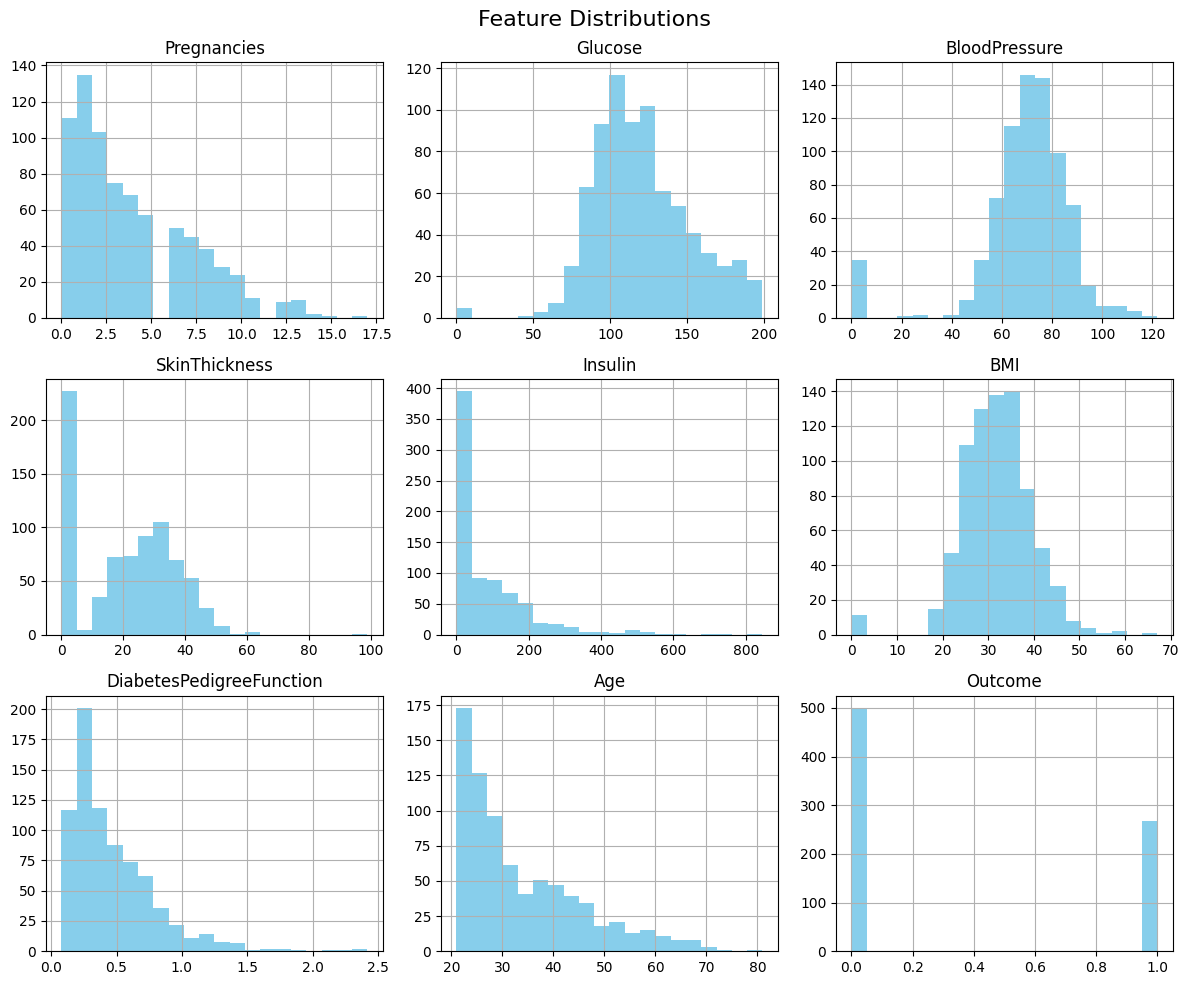

In [ ]:
df.hist(bins=20, figsize=(12,10),color='skyblue')
plt.suptitle("Feature Distributions",fontsize=16)
plt.tight_layout()
plt.show()

C) Correlation Heatmap

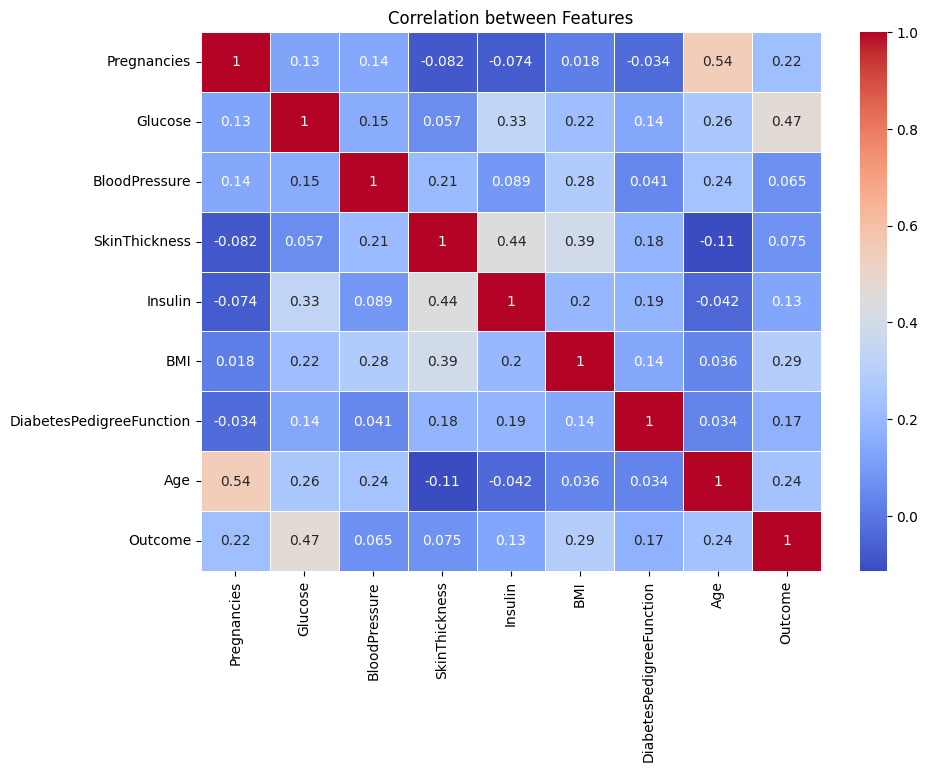

In [ ]:
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm',linewidths=0.5)
plt.title("Correlation between Features")
plt.show()

Prepare the Data for Machine Learning

A) Split into X and Y

In [ ]:
# X = input features (all columns except 'Outcome')
X = df.drop('Outcome', axis=1)

# y = target/output label
y = df['Outcome']

# Check shapes
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)


Shape of X: (768, 8)
Shape of y: (768,)


B) Split into Training and Testing Sets

In [ ]:
from sklearn.model_selection import train_test_split

# random_state ensures the same split every time (reproducibility)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

print("Training Set Size:", X_train.shape)
print("Testing Set Size:", X_test.shape)


Training Set Size: (614, 8)
Testing Set Size: (154, 8)


Code to Sacle Features

In [ ]:
from sklearn.preprocessing import StandardScaler

# Create the scaler
scaler = StandardScaler()

# Fit on training data and transform both training and test sets
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Check result
print("First 5 scaled training rows:\n", X_train[:5])


First 5 scaled training rows:
 [[-0.52639686 -1.15139792 -3.75268255 -1.32277365 -0.70120553 -4.13525578
  -0.49073479 -1.03594038]
 [ 1.58804586 -0.27664283  0.68034485  0.23350519 -0.70120553 -0.48916881
   2.41502991  1.48710085]
 [-0.82846011  0.56687102 -1.2658623  -0.09071957  0.01344832 -0.42452187
   0.54916055 -0.94893896]
 [-1.13052335  1.2541786  -1.04961706 -1.32277365 -0.70120553 -1.30372015
  -0.63929127  2.79212217]
 [ 0.68185612  0.41066475  0.57222224  1.07648956  2.48460077  1.83812075
  -0.68682934  1.13909516]]


Code Train the Model

In [ ]:
from sklearn.linear_model import LogisticRegression

# Create the model
model = LogisticRegression()

# Train the model using the training data
model.fit(X_train, y_train)

print("✅ Model Training Complete")


✅ Model Training Complete


Code to Predict and Evaluate

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Make predictions on the test set
y_pred = model.predict(X_test)

# 1. Accuracy Score
print("✅ Accuracy Score:", accuracy_score(y_test, y_pred))

# 2. Confusion Matrix
print("\n📊 Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# 3. Classification Report
print("\n📄 Classification Report:")
print(classification_report(y_test, y_pred))


✅ Accuracy Score: 0.7532467532467533

📊 Confusion Matrix:
[[79 20]
 [18 37]]

📄 Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.80      0.81        99
           1       0.65      0.67      0.66        55

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.73       154
weighted avg       0.76      0.75      0.75       154



Predict Diabetes for a New Person


In [17]:
input_data = (5, 166, 72, 19, 175, 25.8, 0.587, 51)

# Step 1: Convert input to NumPy array
input_array = np.asarray(input_data).reshape(1, -1)

# Step 2: Scale the input
scaled_input = scaler.transform(input_array)

# Step 3: Predict
prediction = model.predict(scaled_input)

# Step 4: Display result
if prediction[0] == 0:
    print('🟢 The person is NOT diabetic')
else:
    print('🔴 The person HAS diabetes')





🔴 The person HAS diabetes


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
